In [2]:
import math, random, os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
csv_path = os.path.join("datasets/lesson3", "mnist_train.csv" )
dataset = pd.read_csv(csv_path)

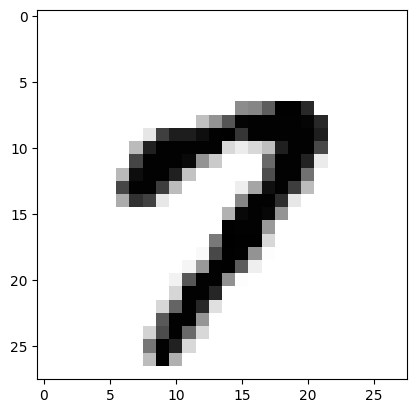

np.int64(7)

In [4]:
y = dataset.iloc[:, 0]
X = dataset.iloc[:, 1:]

some_digit_index = 15
some_digit = X.values[some_digit_index]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.show()
y[some_digit_index]

In [5]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=30, random_state=42)
#sgd_clf.fit(X, y)
#sgd_clf.predict([some_digit])

In [6]:
from sklearn.model_selection import cross_val_score
#cross_val_score(sgd_clf, X, y, cv=3, scoring="f1_weighted")

In [7]:
from sklearn.model_selection import cross_val_predict
#y_train_pred = cross_val_predict(sgd_clf, X, y, cv=3)

In [10]:
from sklearn.preprocessing import StandardScaler

csv_path_dataset = os.path.join("datasets/lesson3", "mnist_train.csv" )
csv_path_testset = os.path.join("datasets/lesson3", "mnist_test.csv" )
dataset = pd.read_csv(csv_path_dataset)
testset = pd.read_csv(csv_path_testset)

y_train = dataset.iloc[:, 0]
X_train = dataset.iloc[:, 1:]

y_test = testset.iloc[:, 0]
X_test = testset.iloc[:, 1:]

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(500, 200),  # Two hidden layers with 500 and 200 neurons
    activation='relu',              # ReLU activation function
    solver='adam',                  # Adam optimizer
    alpha=0.0001,                   # L2 regularization parameter
    max_iter=1000,                  # Maximum number of iterations
    random_state=42                 # For reproducibility
)

# Train the model on the scaled training data
mlp.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test_scaled)

# Calculate and print the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}") # Accuracy: 0.9788


from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(mlp, X_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

Accuracy: 0.9763


array([[5830,    1,   12,    5,    3,    9,   17,   11,   21,   14],
       [   3, 6641,   24,    4,    5,    5,    7,   31,   18,    4],
       [  20,    9, 5806,   25,   17,    3,    7,   29,   34,    8],
       [   8,    6,   66, 5878,    0,   66,    2,   27,   49,   29],
       [   7,   15,   12,    2, 5713,    3,   12,   18,   10,   50],
       [  11,    4,    3,   56,    5, 5235,   36,    6,   50,   15],
       [  30,    8,    3,    0,   11,   35, 5819,    0,   12,    0],
       [   3,   13,   61,   13,   16,    8,    0, 6116,    9,   26],
       [  25,   18,   38,   42,   10,   44,   17,    7, 5627,   23],
       [  15,    5,    5,   26,   84,   54,    3,   66,   31, 5660]])